In [109]:
import pandas as pd
import plotly.express as px

path = "../data/raw/National Elections Turnout/idea_export.csv"
df = pd.read_csv(path)

In [110]:
eu_countries = [
       'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden']

cols = ['Country', 'Year', 'Voter Turnout']

#Keeping the necessary columns
df = df[cols]

#Converting voter turnout values so they can be displayed properly
#e.g. 46.43% -> 0.4632 
df['Voter Turnout'] = df['Voter Turnout'].str.rstrip('%').astype('float64') / 100

#Filtering EU countries

df = df.query(" Country == @eu_countries ")

#getting the voter turnout values for the latest elections of each country
df = df.sort_values('Year', ascending = True).groupby('Country').last()
df.reset_index(inplace = True)

df

,Country,Year,Voter Turnout
0,Austria,2019,0.7559
1,Belgium,2019,0.8838
2,Bulgaria,2021,0.4911
3,Croatia,2020,0.4690
4,Cyprus,2021,0.6572
5,Czech Republic,2021,0.6539
6,Denmark,2019,0.8460
7,Estonia,2019,0.6367
8,Finland,2019,0.6873
9,France,2017,0.4870


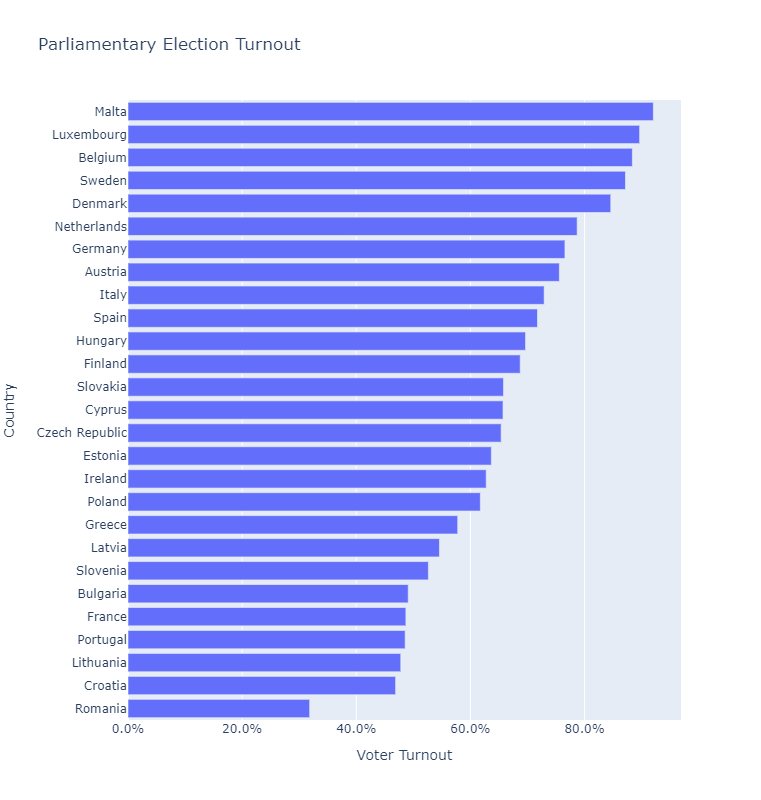

In [111]:
df = df.sort_values('Voter Turnout', ascending = True)

fig = px.bar(df, x='Voter Turnout', y = 'Country',
             height = 800, width = 600, title = "Parliamentary Election Turnout")
fig.update_layout(xaxis_tickformat = '.1%')

fig.show()

In [112]:
#saving dataframe to CSV file

path = "../data/clean/National Elections Turnout/idea_export.csv"

df.to_csv(path, index = False, float_format = "%.4f")